In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv", usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [3]:
df.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

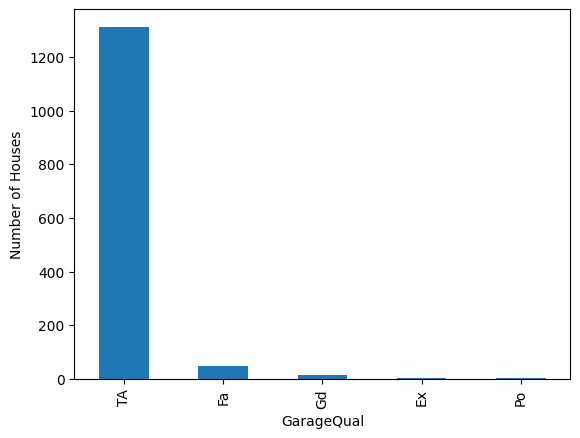

In [4]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel('Number of Houses')
plt.show()

In [5]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

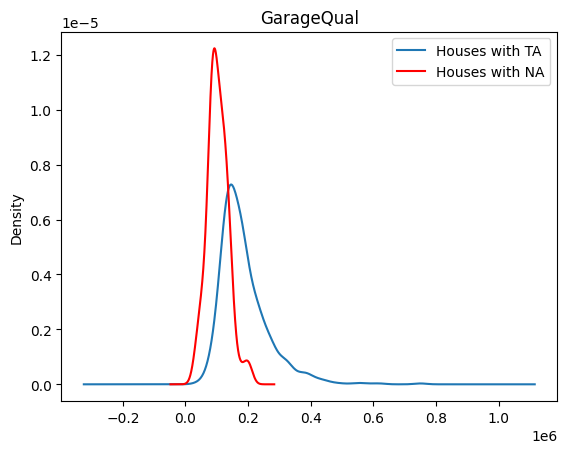

In [6]:
fig=plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ["Houses with TA", "Houses with NA"]
ax.legend(lines, labels, loc='best')
plt.title("GarageQual")
plt.show()

In [7]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [8]:
df['GarageQual'] = df['GarageQual'].fillna('TA')

<Axes: xlabel='GarageQual'>

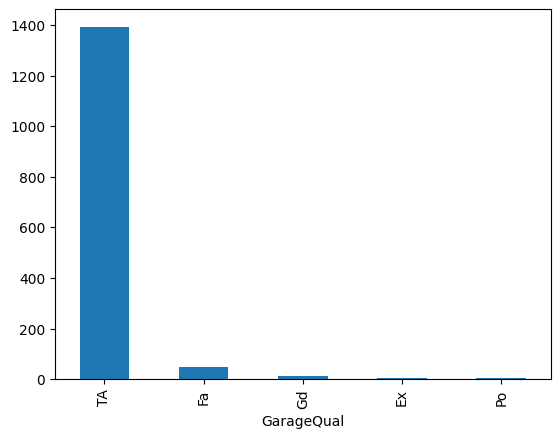

In [9]:
df['GarageQual'].value_counts().plot.bar()

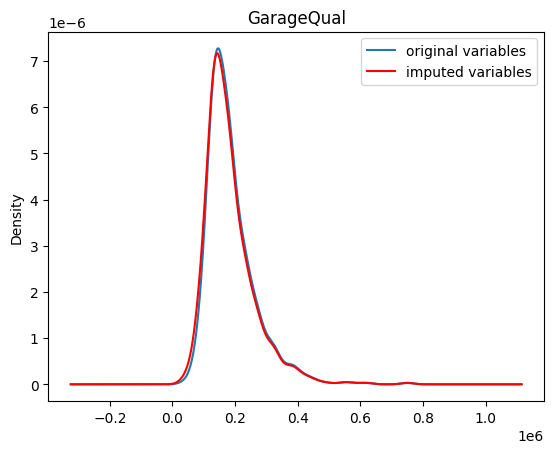

In [11]:
fig=plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ["original variables", "imputed variables"]
ax.legend(lines, labels, loc='best')
plt.title("GarageQual")
plt.show()

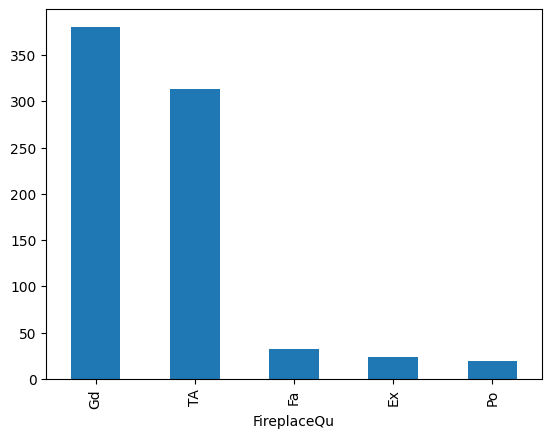

In [12]:
df['FireplaceQu'].value_counts().plot.bar()
plt.show()

In [13]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

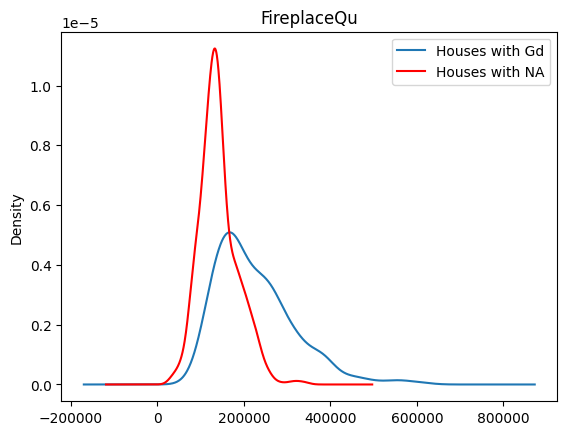

In [14]:
fig=plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ["Houses with Gd", "Houses with NA"]
ax.legend(lines, labels, loc='best')
plt.title("FireplaceQu")
plt.show()

In [15]:
temp = df[df['FireplaceQu'] == 'Gd']['SalePrice']

In [16]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('Gd')

<Axes: xlabel='FireplaceQu'>

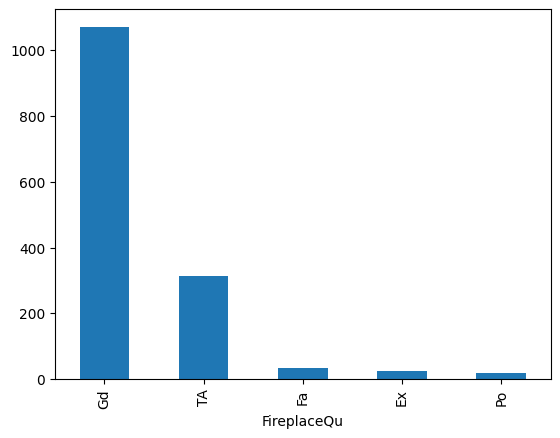

In [18]:
df['FireplaceQu'].value_counts().plot.bar()

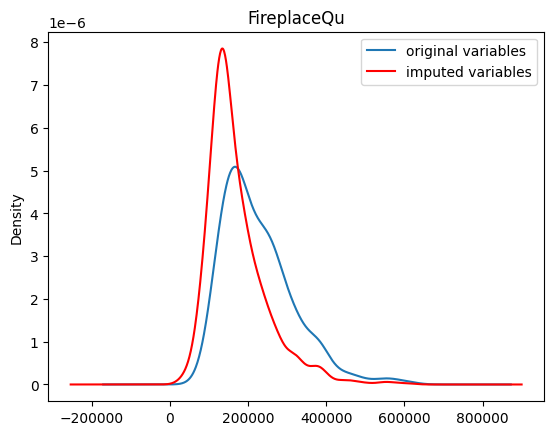

In [19]:
fig=plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ["original variables", "imputed variables"]
ax.legend(lines, labels, loc='best')
plt.title("FireplaceQu")
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [23]:
X = df.drop(columns=['SalePrice'], axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
imputer = SimpleImputer(strategy='most_frequent')

In [25]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)